# Creating an Extended dataset of Covid-19 Epidemic in Bangladesh and showing them in some basic visualizations

Covid-19 has taken an epidemic form all over the world. Producing a fair dataset of all the informations will give a closer look to the dynamics of the current situation. But, in Bangladesh, it is very hard to get an extended database. All I found on the internet are Cumulative dataset of Confirmed, Recovered and Deaths only. So, I decided to make one myself. I am a very very beginner in this arena. So, this is actually my practice pad.

I got a dataset on the Internet only containing the cumulative Confirmed, Recovered and Deaths counts. I happen to find some press releases regarding covid-19 on these sources, [Here](https://iedcr.gov.bd/index.php/component/content/article/11-others/227-pressrelease) and [Here](https://corona.gov.bd/press-release). But they contain inconsistant and ambiguous informations. Yet, I checked my downloaded dataset, made some edits and collected the information of tests per day. 

So, The data collection is over, now it's time to accumalate them and producing some more facts outta them. I am using Python to code and pandas to sort things out. Okay, then start with importing sum modules that will help us in rest of the parts. I imported `chdir` from `OS` to change my working directory. I also explecitly imported the matplotlib converters because in future the program will erroneous except it.

In [1]:
from os import chdir
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

The edited csv file is read using pandas' built in `read_csv` method which directly converts the csv file into pandas dataframe. Let's see what's inside the file and what are the data types. The data types I may have to be changed according to my need.

In [2]:
chdir('E:\\Projects\\Jupyter\\Covid-19BD')
dataset = pd.read_csv('covid-19_bd_cumu_cleaned.csv')
print(dataset)
print(dataset.dtypes)

          Date  Confirmed  Deaths  Recovered
0   2020-03-08          3       0          0
1   2020-03-09          3       0          0
2   2020-03-10          3       0          0
3   2020-03-11          3       0          0
4   2020-03-12          3       0          0
5   2020-03-13          3       0          0
6   2020-03-14          3       0          0
7   2020-03-15          5       0          0
8   2020-03-16          8       0          0
9   2020-03-17         10       0          0
10  2020-03-18         14       1          3
11  2020-03-19         17       1          3
12  2020-03-20         20       1          3
13  2020-03-21         24       1          3
14  2020-03-22         28       2          3
15  2020-03-23         33       2          3
16  2020-03-24         39       3          5
17  2020-03-25         39       5          7
18  2020-03-26         44       5         11
19  2020-03-27         48       5         11
20  2020-03-28         48       5         15
21  2020-0

So, the dataset is in cumulative form which I have already mentioned. It's a good thing that the numbers are already in `int64` type, so they don't need to be changed. But in case of the `Date` column, I will turn it into datetime object. I will print  aportion of the dataframe and data types to be sure if this is working fine.

In [3]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')
print(dataset.head())
print(dataset.dtypes)


        Date  Confirmed  Deaths  Recovered
0 2020-03-08          3       0          0
1 2020-03-09          3       0          0
2 2020-03-10          3       0          0
3 2020-03-11          3       0          0
4 2020-03-12          3       0          0
Date         datetime64[ns]
Confirmed             int64
Deaths                int64
Recovered             int64
dtype: object


I am going to change all the cumulative data to a non-cumulative form. So, let me keep a copy of the original dataset. I will need this later. I will give the columns of `cumu_data` some new names.

In [4]:
cumu_data = dataset.copy()
cumu_data.columns = ['Date','Total Cases','Total Deaths','Total Recovered']

Now,I will turn the dataset in a non-cumulative form. Then I manually created a list named `tests` which contains the information about how many tests are taken each day. I will add this list as a new column to my `dataset` dataframe and save it to csv format. It will help if I try to reproduce the whole thing again. Also take a look at a portion of dataset to make sure everything is fine.

In [5]:
for i in range(len(dataset)-1,0,-1):
    dataset.loc[i,'Confirmed':'Recovered'] -= dataset.loc[i-1,'Confirmed':'Recovered']
tests = [120,7,10,10,16,24,24,30,27,49,49,46,36,36,65,56,92,82,126,106,47,109,153,140,157,141,203,434,367,468,679,981,905,\
         1184,954,1340]
dataset['New Tests'] = tests
dataset.columns = ['Date','New Cases','New Deaths','New Recovered','New Tests']
dataset.to_csv('covid-19_bd_cleaned.csv',index=False)
print(dataset.tail())

         Date  New Cases  New Deaths  New Recovered  New Tests
31 2020-04-08         54           3              0        981
32 2020-04-09        112           1              0        905
33 2020-04-10         94           6              0       1184
34 2020-04-11         58           3              3        954
35 2020-04-12        139           4              3       1340


But the test data were for each day, we also need to turn it to cumulative form. Lets do it.

In [6]:
cumu_tests = []
cumu_tests = tests[:]
for i in range(1,len(tests)):
    cumu_tests[i] += cumu_tests[i-1]
print(cumu_tests)
print(tests)

[120, 127, 137, 147, 163, 187, 211, 241, 268, 317, 366, 412, 448, 484, 549, 605, 697, 779, 905, 1011, 1058, 1167, 1320, 1460, 1617, 1758, 1961, 2395, 2762, 3230, 3909, 4890, 5795, 6979, 7933, 9273]
[120, 7, 10, 10, 16, 24, 24, 30, 27, 49, 49, 46, 36, 36, 65, 56, 92, 82, 126, 106, 47, 109, 153, 140, 157, 141, 203, 434, 367, 468, 679, 981, 905, 1184, 954, 1340]


Add this list to my cumulative dataset which is `cumu_data`.

In [7]:
cumu_data['Total Tests'] = cumu_tests
print(cumu_data.tail())

         Date  Total Cases  Total Deaths  Total Recovered  Total Tests
31 2020-04-08          218            20               33         4890
32 2020-04-09          330            21               33         5795
33 2020-04-10          424            27               33         6979
34 2020-04-11          482            30               36         7933
35 2020-04-12          621            34               39         9273


Now, this is time for the most interesting  part. Lets produce more data from what we have. I am calculing number of total active cases each day first in `active`. And then I will save percentage of death per confirmed case to `death_by_confirmed`, number of death divided by number of recovered to `death_by_recovered`, percentage of confirmed cases per total tests each day to `cases_by_tests`, number of confirmed cases per 1 million population in `cases_per_1m` and number of deaths per 1 million population to `deaths_per_1m`. Each of them is a series. Of course, I will print a portion of all of them to make sure they are calculated correctly.

In [8]:
active = cumu_data['Total Cases'] - cumu_data['Total Deaths'] - cumu_data['Total Recovered']
death_by_confirmed = cumu_data['Total Deaths']*100/cumu_data['Total Cases']
death_by_recovered = cumu_data['Total Deaths']/cumu_data['Total Recovered']
cases_by_tests = cumu_data['Total Cases']*100/cumu_data['Total Tests']
cases_per_1m = cumu_data['Total Cases']/180
deaths_per_1m = cumu_data['Total Deaths']/180
print(active.tail())
print(death_by_confirmed.tail())
print(death_by_recovered.tail())
print(cases_per_1m.tail())

31    165
32    276
33    364
34    416
35    548
dtype: int64
31    9.174312
32    6.363636
33    6.367925
34    6.224066
35    5.475040
dtype: float64
31    0.606061
32    0.636364
33    0.818182
34    0.833333
35    0.871795
dtype: float64
31    1.211111
32    1.833333
33    2.355556
34    2.677778
35    3.450000
Name: Total Cases, dtype: float64


Now I will append all the series from previous part to the `dataset` dataframe. This is our complete extended dataset. Check wheather nothing is miscalculated.

In [9]:
dataset['Total Cases'] = cumu_data['Total Cases']
dataset['Total Deaths'] = cumu_data['Total Deaths']
dataset['Total Recovered'] = cumu_data['Total Recovered']
dataset['Total Active'] = active
dataset['Total Tests'] = cumu_data['Total Tests']
dataset['Death/Cases (%)'] = death_by_confirmed
dataset['Death/Recovered'] = death_by_recovered.fillna(0)
dataset['Cases/Tests(%)'] = cases_by_tests
dataset['Cases/1M Pop.'] = cases_per_1m
dataset['Deaths/1M Pop.'] = deaths_per_1m
print(dataset.head())

        Date  New Cases  New Deaths  New Recovered  New Tests  Total Cases  \
0 2020-03-08          3           0              0        120            3   
1 2020-03-09          0           0              0          7            3   
2 2020-03-10          0           0              0         10            3   
3 2020-03-11          0           0              0         10            3   
4 2020-03-12          0           0              0         16            3   

   Total Deaths  Total Recovered  Total Active  Total Tests  Death/Cases (%)  \
0             0                0             3          120              0.0   
1             0                0             3          127              0.0   
2             0                0             3          137              0.0   
3             0                0             3          147              0.0   
4             0                0             3          163              0.0   

   Death/Recovered  Cases/Tests(%)  Cases/1M Pop. 

So the complete extended dataset will be saved to csv. For convenience, I would like to store one of it each day with the date when I created them. It will be very helpful in future if I need to use them again.

In [10]:
dataset.to_csv('covid-19_bd_extended_' + str(date.today()) + '.csv',index=False,float_format='%.3f')

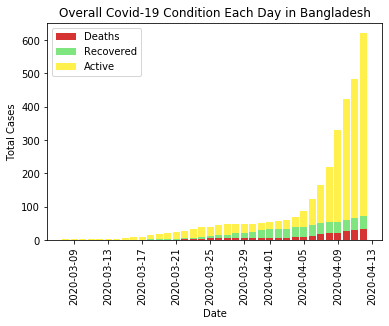

In [11]:
bars = dataset['Total Deaths'] + dataset['Total Recovered']
plt.bar(dataset['Date'],dataset['Total Deaths'] , color=(0.8,0,0,0.8), label='Deaths')
plt.bar(dataset['Date'], dataset['Total Recovered'], bottom=dataset['Total Deaths'], color=(0,0.8,0,0.5), label='Recovered')
plt.bar(dataset['Date'], dataset['Total Active'], bottom=bars,color='#ffea00',alpha=0.7,label='Active')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(loc="upper left")
plt.title("Overall Covid-19 Condition Each Day in Bangladesh")
plt.show()

Okay. So the dataset has been built. Now it's time to do some visualization. I will use pyplot to obtain curves and bartcharts. These charts will give a very good idea of the current situation of Covid-19 epidemic in Bangladesh. I will use different colors for different kind of data.

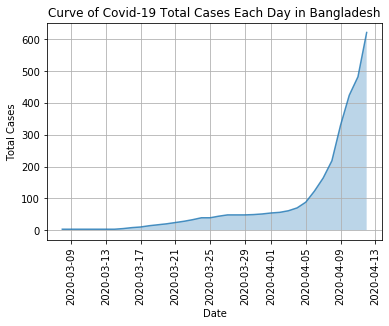

In [12]:
plt.plot(dataset['Date'],dataset['Total Cases'],alpha=0.8)
plt.fill_between(dataset['Date'], dataset['Total Cases'], 0,alpha=0.3)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Curve of Covid-19 Total Cases Each Day in Bangladesh")
plt.grid(True)
plt.show()

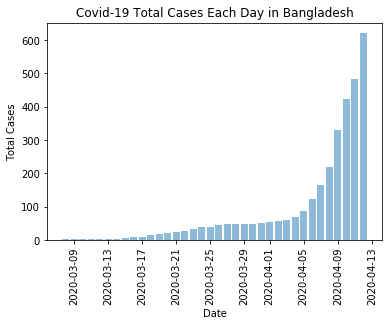

In [13]:
plt.bar(dataset['Date'],dataset['Total Cases'],alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Covid-19 Total Cases Each Day in Bangladesh")
plt.show()

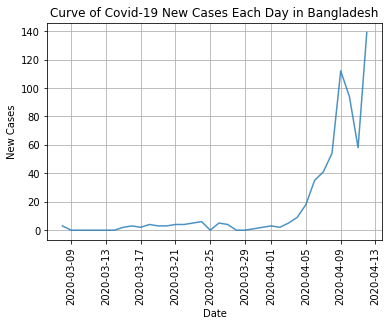

In [14]:
plt.plot(dataset['Date'],dataset['New Cases'],alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Curve of Covid-19 New Cases Each Day in Bangladesh")
plt.grid(True)
plt.show()

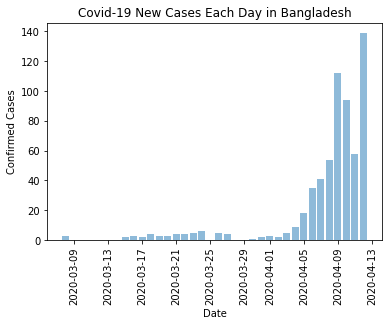

In [15]:
plt.bar(dataset['Date'],dataset['New Cases'],align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Covid-19 New Cases Each Day in Bangladesh")
plt.show()

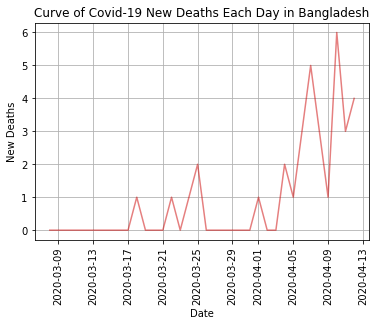

In [16]:
plt.plot(dataset['Date'],dataset['New Deaths'],color=(0.8,0,0,0.5))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.title("Curve of Covid-19 New Deaths Each Day in Bangladesh")
plt.grid(True)
plt.show()

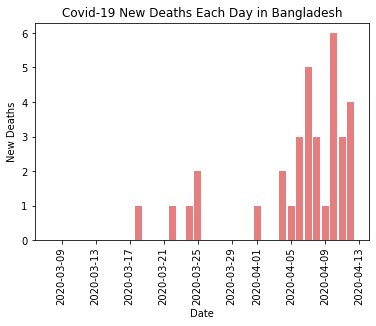

In [17]:
plt.bar(dataset['Date'],dataset['New Deaths'],align='center',color=(0.8,0,0,0.5))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.title("Covid-19 New Deaths Each Day in Bangladesh")
plt.show()

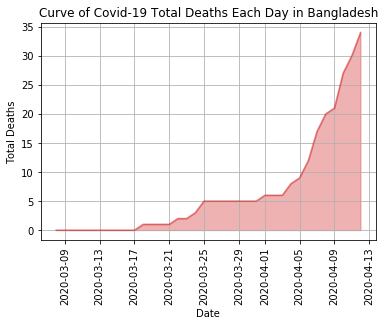

In [18]:
plt.plot(dataset['Date'],dataset['Total Deaths'],color=(0.8,0,0,0.5))
plt.fill_between(dataset['Date'], dataset['Total Deaths'], 0,color=(0.8,0,0,0.3))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Curve of Covid-19 Total Deaths Each Day in Bangladesh")
plt.grid(True)
plt.show()

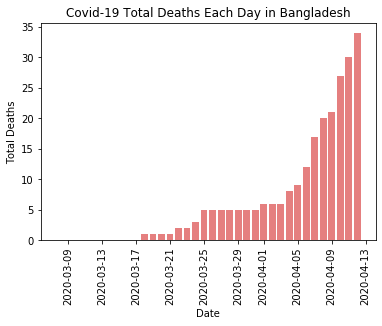

In [19]:
plt.bar(dataset['Date'],dataset['Total Deaths'],align='center',color=(0.8,0,0,0.5))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Covid-19 Total Deaths Each Day in Bangladesh")
plt.show()

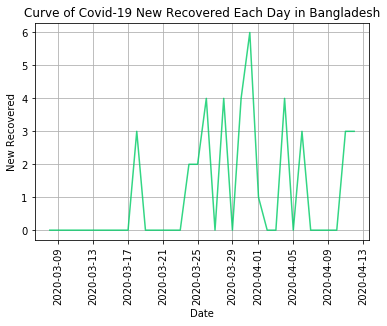

In [20]:
plt.plot(dataset['Date'],dataset['New Recovered'],color=(0,0.8,0.4,0.8))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("New Recovered")
plt.title("Curve of Covid-19 New Recovered Each Day in Bangladesh")
plt.grid(True)
plt.show()

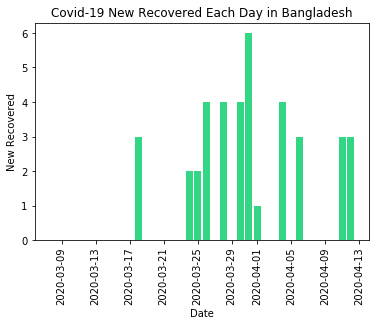

In [21]:
plt.bar(dataset['Date'],dataset['New Recovered'],align='center',color=(0,0.8,0.4,0.8))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("New Recovered")
plt.title("Covid-19 New Recovered Each Day in Bangladesh")
plt.show()

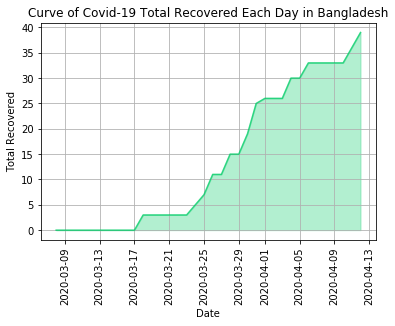

In [22]:
plt.plot(dataset['Date'],dataset['Total Recovered'],color=(0,0.8,0.4,0.8))
plt.fill_between(dataset['Date'], dataset['Total Recovered'], 0,color=(0,0.8,0.4,0.3))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Recovered")
plt.title("Curve of Covid-19 Total Recovered Each Day in Bangladesh")
plt.grid(True)
plt.show()

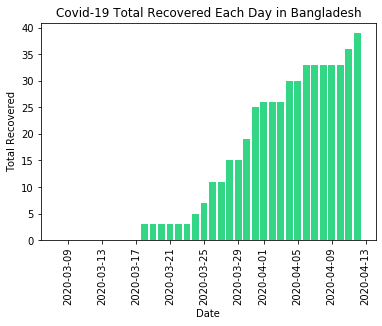

In [23]:
plt.bar(dataset['Date'],dataset['Total Recovered'],align='center',color=(0,0.8,0.4,0.8))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Recovered")
plt.title("Covid-19 Total Recovered Each Day in Bangladesh")
plt.show()

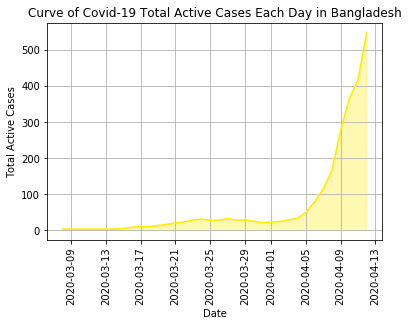

In [24]:
plt.plot(dataset['Date'],dataset['Total Active'],color='#ffea00',alpha=1)
plt.fill_between(dataset['Date'], dataset['Total Active'], 0,color='#ffea00', alpha=0.3)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.title("Curve of Covid-19 Total Active Cases Each Day in Bangladesh")
plt.grid(True)
plt.show()

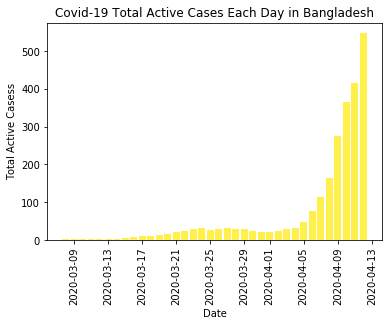

In [25]:
plt.bar(dataset['Date'],dataset['Total Active'],align='center',color='#ffea00',alpha=0.7,)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Total Active Casess")
plt.title("Covid-19 Total Active Cases Each Day in Bangladesh")
plt.show()

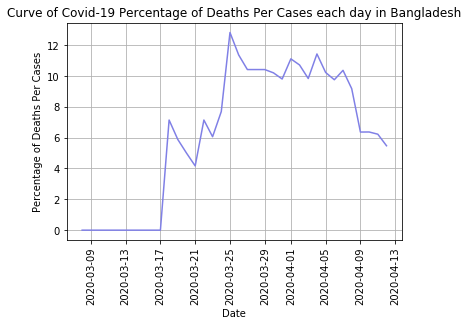

In [26]:
plt.plot(dataset['Date'],dataset['Death/Cases (%)'],color=(0.5,0.5,0.9,1))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Percentage of Deaths Per Cases")
plt.title("Curve of Covid-19 Percentage of Deaths Per Cases each day in Bangladesh")
plt.grid(True)
plt.show()

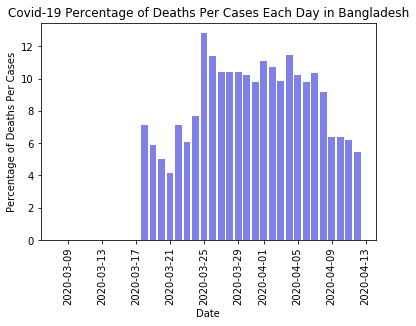

In [27]:
plt.bar(dataset['Date'],dataset['Death/Cases (%)'],align='center',color=(0.5,0.5,0.9,1))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Percentage of Deaths Per Cases")
plt.title("Covid-19 Percentage of Deaths Per Cases Each Day in Bangladesh")
plt.show()

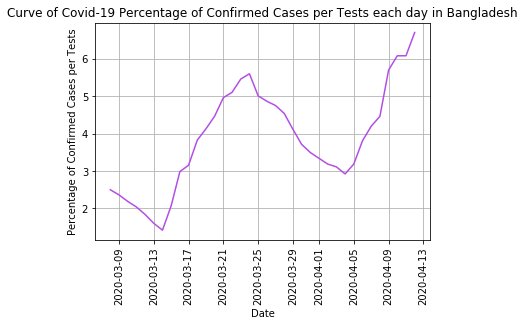

In [28]:
plt.plot(dataset['Date'],dataset['Cases/Tests(%)'],color=(0.7,0.3,0.9,1))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Percentage of Confirmed Cases per Tests")
plt.title("Curve of Covid-19 Percentage of Confirmed Cases per Tests each day in Bangladesh")
plt.grid(True)
plt.show()

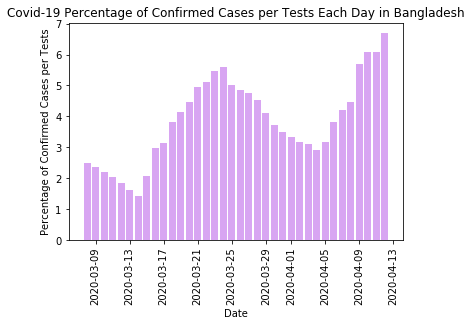

In [29]:
plt.bar(dataset['Date'],dataset['Cases/Tests(%)'],align='center',color=(0.7,0.3,0.9,0.5))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Percentage of Confirmed Cases per Tests")
plt.title("Covid-19 Percentage of Confirmed Cases per Tests Each Day in Bangladesh")
plt.show()

I think this is a good practice for today. It's pretty late to sleep. So I finish it here. I will do some more work on it, if something comes to my mind.